In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from glob import glob

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator

In [4]:
directory = '/home/flanigan/temp/'

In [5]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_163416_centered.npd/')

In [6]:
sss_root_names = [name for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [7]:
sss_list = [npd.read(sss_root_names[index]) for index in (3, 4, 5)]
print("LO indices: " + ", ".join(["{:d}".format(sss.state.lo_index) for sss in sss_list]))
print("DAC attenuations: " + ", ".join(["{:.1f}".format(sss.stream.roach_state.dac_attenuation) for sss in sss_list]))

LO indices: 1, 1, 1
DAC attenuations: 20.0, 30.0, 40.0


In [8]:
npy_files = sorted(glob('2017-02-1?_??????_centered.npd.npy'))
npy_files

['2017-02-15_124211_centered.npd.npy',
 '2017-02-15_140614_centered.npd.npy',
 '2017-02-15_155457_centered.npd.npy',
 '2017-02-15_163416_centered.npd.npy',
 '2017-02-15_170842_centered.npd.npy',
 '2017-02-15_182325_centered.npd.npy',
 '2017-02-15_234604_centered.npd.npy',
 '2017-02-16_073659_centered.npd.npy',
 '2017-02-16_075930_centered.npd.npy',
 '2017-02-16_081727_centered.npd.npy',
 '2017-02-16_092616_centered.npd.npy',
 '2017-02-16_121807_centered.npd.npy',
 '2017-02-16_140100_centered.npd.npy',
 '2017-02-16_143022_centered.npd.npy',
 '2017-02-16_150908_centered.npd.npy']

In [9]:
all_data = pd.concat([pd.DataFrame.from_records(np.load(f)) for f in npy_files], ignore_index=True).sort_values(by='stream_temperature_package')
all_data.shape

(225, 72)

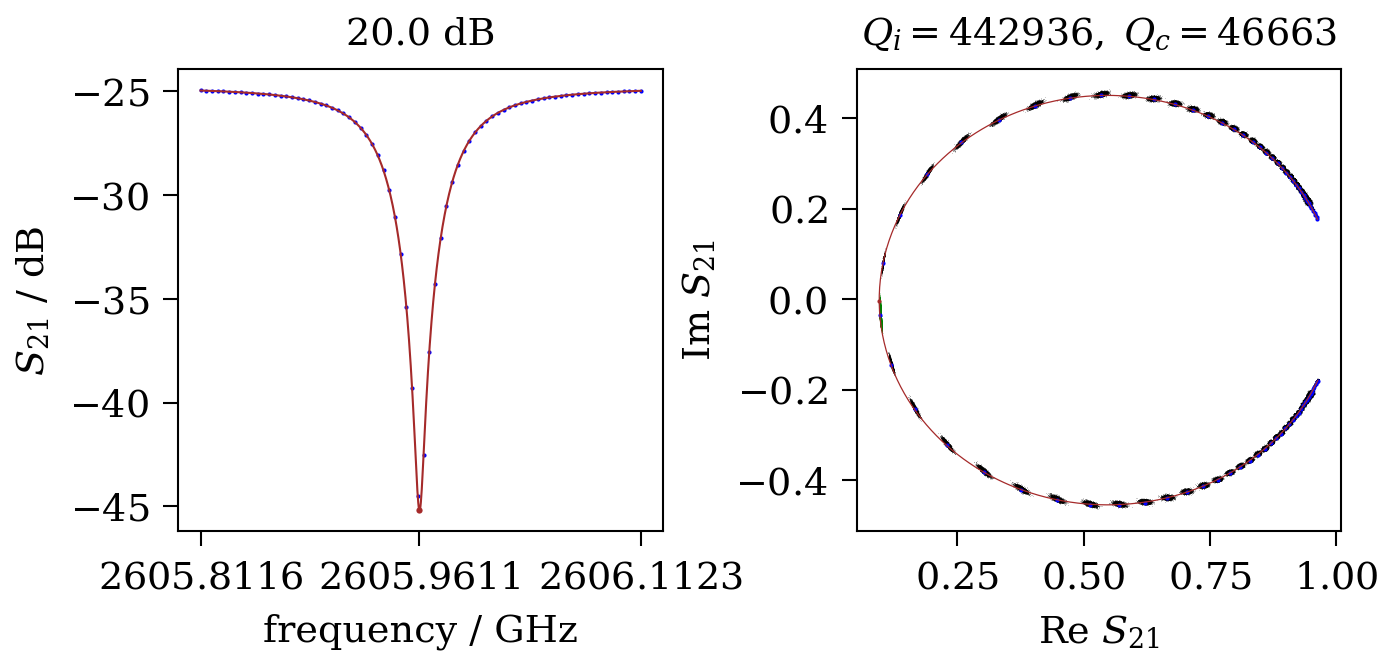

In [10]:
sss = sss_list[0]
fig, (f_ax, c_ax) = plt.subplots(1, 2, figsize=(5, 2), gridspec_kw={'wspace': 0.4})
f_ax.set_xlabel('frequency / GHz')
f_ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(f_ax, sss.resonator)
plot_basic.sss_complex_plane(sss, c_ax)                                                                   
c_ax.set_xlabel('Re $S_{21}$')
c_ax.set_ylabel('Im $S_{21}$')
f_ax.set_title('{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
c_ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

fig.savefig(directory + 's21_vs_f_and_complex.png')

In [11]:
xx_linestyle = '-'
yy_linestyle = ':'

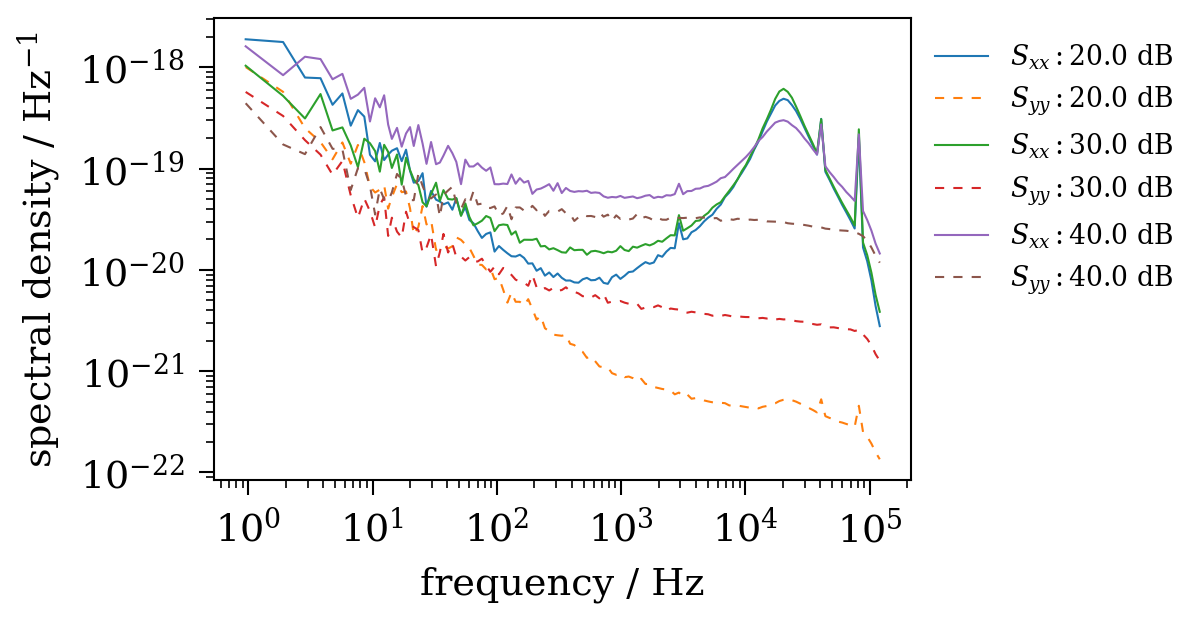

In [12]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
for sss in sss_list:
    ax.plot(sss.S_frequency, sss.S_xx, linestyle=xx_linestyle, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, linestyle=yy_linestyle, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

fig.savefig(directory + 'all_Sxx_and_Syy_vs_frequency.pdf')

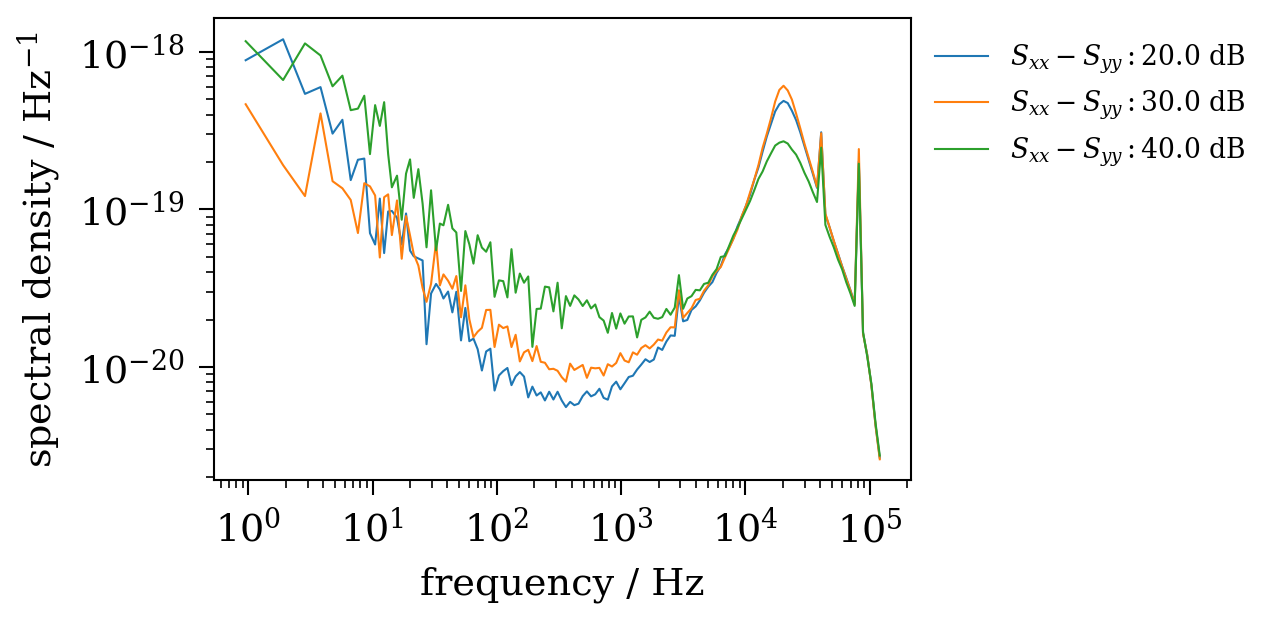

In [13]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
for sss in sss_list:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

fig.savefig(directory + 'all_Sxx-Syy_vs_frequency.pdf')

In [14]:
all_data.columns

Index([u'index', u'S_counts', u'S_frequency', u'S_xx', u'S_xx_variance',
       u'S_xy', u'S_yy', u'S_yy_variance', u'analysis_epoch', u'lo_index',
       u'magnetic_shield_pocket_orientation', u'number', u'res_A_mag',
       u'res_A_mag_error', u'res_A_slope', u'res_A_slope_error', u'res_Q',
       u'res_Q_e', u'res_Q_e_imag', u'res_Q_e_imag_error', u'res_Q_e_real',
       u'res_Q_e_real_error', u'res_Q_error', u'res_Q_i', u'res_delay',
       u'res_delay_error', u'res_f_0', u'res_f_0_error', u'res_f_min',
       u'res_f_min_error', u'res_frequency_data', u'res_model_frequency',
       u'res_model_s21', u'res_model_s21_at_f_0', u'res_model_s21_normalized',
       u'res_model_s21_normalized_at_f_0', u'res_phi', u'res_phi_error',
       u'res_redchi', u'res_s21_data', u'res_s21_data_normalized',
       u'res_s21_errors', u'roach_adc_sample_rate', u'roach_bank',
       u'roach_boffile', u'roach_dac_attenuation', u'roach_debug_register',
       u'roach_fft_shift_register', u'roach_hardwar

In [15]:
x_color = 'blue'
i_color = 'brown'

In [16]:
lo_indices = np.unique(all_data.lo_index)

(-18, 360)

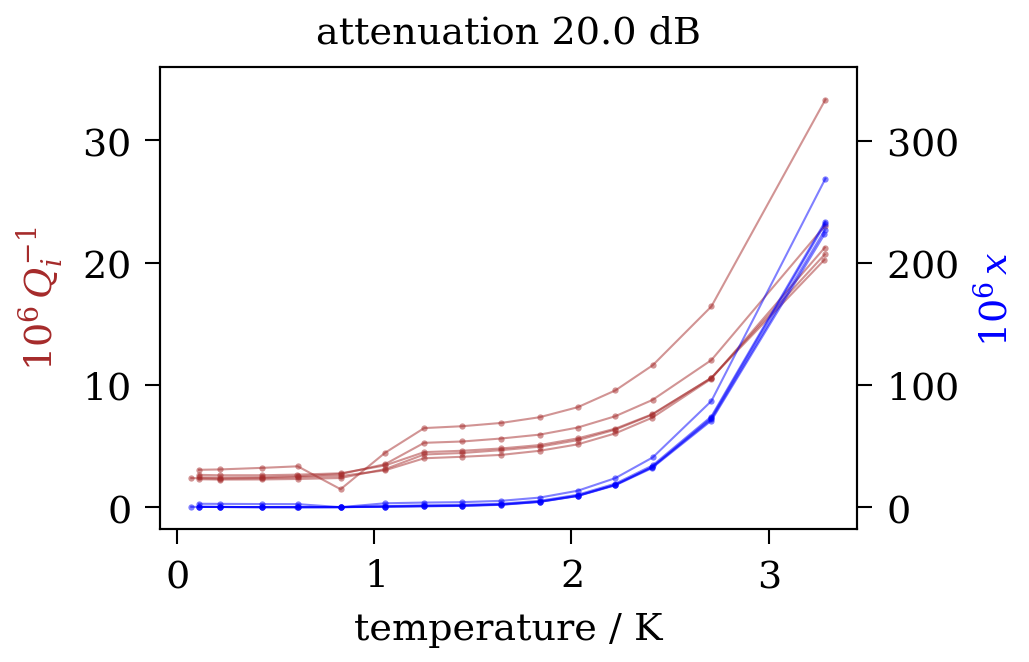

In [21]:
attenuation = 20
fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
i_ax.set_xlabel('temperature / K')
i_ax.set_title('attenuation {:.1f} dB'.format(attenuation))
i_ax.set_ylabel('$10^6 \, Q_i^{-1}$', color=i_color)
x_ax.set_ylabel('$10^6 \, x$', color=x_color)
for lo_index in lo_indices:
    df = all_data[(all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    i_ax.plot(df.stream_temperature_package, 1e6 / df.res_Q_i, '.-', color=i_color, alpha=0.5)
    x_ax.plot(df.stream_temperature_package, 1e6 * (df.res_f_0.max() / df.res_f_0 - 1), '.-', color=x_color, alpha=0.5)
i_ax.set_ylim(-1.8, 36)
x_ax.set_ylim(-18, 360)

fig.savefig(directory + 'x_and_iQi_vs_temperature.pdf')

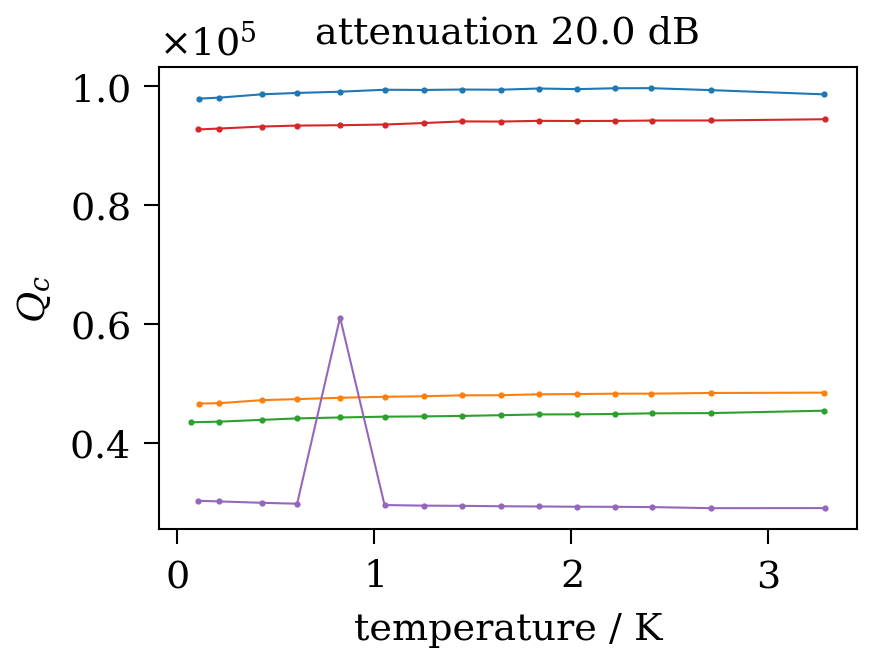

In [18]:
attenuation = 20
fig, ax = plt.subplots()
ax.set_title('attenuation {:.1f} dB'.format(attenuation))
ax.set_xlabel('temperature / K')
ax.set_ylabel('$Q_c$')
for lo_index in lo_indices:
    df = all_data[(all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    ax.plot(df.stream_temperature_package, df.res_Q_e_real, '.-')